In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree

sns.set_style(style="darkgrid")

In [2]:
df = pd.read_csv('data/dataset_practica_final.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

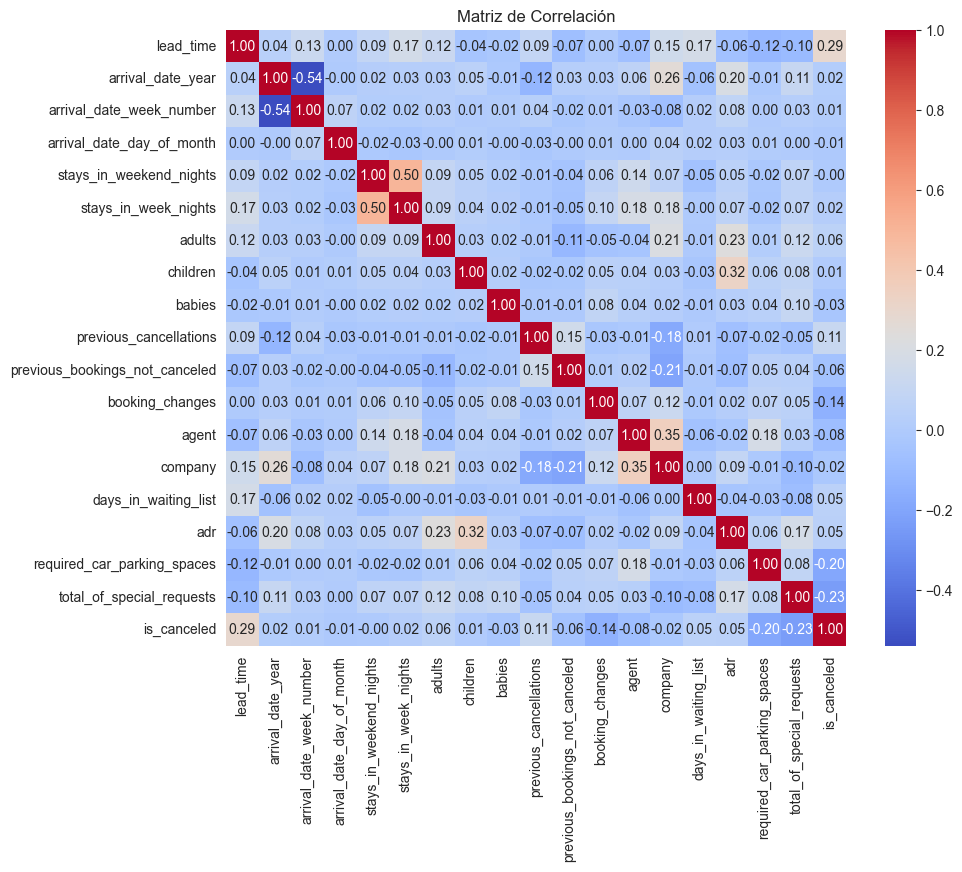

In [7]:
numerical_features = [
    'lead_time', 'arrival_date_year', 'arrival_date_week_number',
    'arrival_date_day_of_month', 'stays_in_weekend_nights',
    'stays_in_week_nights', 'adults', 'children', 'babies',
    'previous_cancellations', 'previous_bookings_not_canceled',
    'booking_changes', 'agent', 'company', 'days_in_waiting_list',
    'adr', 'required_car_parking_spaces', 'total_of_special_requests']

plt.figure(figsize=(10, 8))
corr = df[numerical_features + ['is_canceled']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

 *lead_time*: Los huespedes con mayor anticipación tienden a cancelar más sus reservas.
 También los que ya han cancelado en ocasiones previas.


In [9]:
#* Limipieza y preprocesamiento de datos
#* Ya lo hicimos en la regresión Logística
#- Eliminación de duplicados
#-Tratamiento de nulos
#- Codificación de variables categóricas
#- Separación de variables predictoras y target
#- División train/test con estratificación.

df_clean = pd.read_csv('data/dataset_practica_final_preprocessed.csv')

In [10]:
df_clean

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,is_canceled
0,3.045939,-1.764027,0.011822,-1.676896,-0.974172,-1.278453,0.198253,-0.304108,-0.095288,-0.201653,...,False,False,False,False,False,False,False,True,False,0
1,7.636196,-1.764027,0.011822,-1.676896,-0.974172,-1.278453,0.198253,-0.304108,-0.095288,-0.201653,...,False,False,False,False,False,False,False,True,False,0
2,-0.847064,-1.764027,0.011822,-1.676896,-0.974172,-0.791496,-1.397925,-0.304108,-0.095288,-0.201653,...,False,False,False,False,False,False,False,True,False,0
3,-0.777338,-1.764027,0.011822,-1.676896,-0.974172,-0.791496,-1.397925,-0.304108,-0.095288,-0.201653,...,False,False,False,False,False,False,False,True,False,0
4,-0.765717,-1.764027,0.011822,-1.676896,-0.974172,-0.304540,0.198253,-0.304108,-0.095288,-0.201653,...,False,False,False,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,-0.661129,1.151008,0.596853,1.605467,0.963971,1.156329,0.198253,-0.304108,-0.095288,-0.201653,...,False,False,False,False,False,False,False,True,False,0
87392,0.256922,1.151008,0.596853,1.718652,0.963971,1.156329,1.794431,-0.304108,-0.095288,-0.201653,...,False,False,False,False,False,False,False,True,False,0
87393,-0.533299,1.151008,0.596853,1.718652,0.963971,1.156329,0.198253,-0.304108,-0.095288,-0.201653,...,False,False,False,False,False,False,False,True,False,0
87394,0.338269,1.151008,0.596853,1.718652,0.963971,1.156329,0.198253,-0.304108,-0.095288,-0.201653,...,False,False,False,False,False,False,False,True,False,0


In [13]:
#* Separamos las variables predictoras y la variable objetivo
X = df_clean.drop(columns=['is_canceled'])
y = df_clean['is_canceled']

In [14]:
X

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,3.045939,-1.764027,0.011822,-1.676896,-0.974172,-1.278453,0.198253,-0.304108,-0.095288,-0.201653,...,False,False,False,False,False,False,False,False,True,False
1,7.636196,-1.764027,0.011822,-1.676896,-0.974172,-1.278453,0.198253,-0.304108,-0.095288,-0.201653,...,False,False,False,False,False,False,False,False,True,False
2,-0.847064,-1.764027,0.011822,-1.676896,-0.974172,-0.791496,-1.397925,-0.304108,-0.095288,-0.201653,...,False,False,False,False,False,False,False,False,True,False
3,-0.777338,-1.764027,0.011822,-1.676896,-0.974172,-0.791496,-1.397925,-0.304108,-0.095288,-0.201653,...,False,False,False,False,False,False,False,False,True,False
4,-0.765717,-1.764027,0.011822,-1.676896,-0.974172,-0.304540,0.198253,-0.304108,-0.095288,-0.201653,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,-0.661129,1.151008,0.596853,1.605467,0.963971,1.156329,0.198253,-0.304108,-0.095288,-0.201653,...,False,False,False,False,False,False,False,False,True,False
87392,0.256922,1.151008,0.596853,1.718652,0.963971,1.156329,1.794431,-0.304108,-0.095288,-0.201653,...,False,False,False,False,False,False,False,False,True,False
87393,-0.533299,1.151008,0.596853,1.718652,0.963971,1.156329,0.198253,-0.304108,-0.095288,-0.201653,...,False,False,False,False,False,False,False,False,True,False
87394,0.338269,1.151008,0.596853,1.718652,0.963971,1.156329,0.198253,-0.304108,-0.095288,-0.201653,...,False,False,False,False,False,False,False,False,True,False


In [15]:
y

0        0
1        0
2        0
3        0
4        0
        ..
87391    0
87392    0
87393    0
87394    0
87395    0
Name: is_canceled, Length: 87396, dtype: int64

In [17]:
#* Separamos en datos de entrenamiento y datos de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape

((69916, 246), (17480, 246))

🤖 Creamos el modelo de árbol de decisión y utilizamos GridSearch para encontrar los mejores hiperparámetros.

In [19]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV con validación cruzada
grid_search = GridSearchCV(
    estimator=model_dt,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=0
)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_params

{'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 5}

In [26]:
model_dt = best_model
model_dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,15
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [27]:
y_pred = model_dt.predict(X_test)
y_proba = model_dt.predict_proba(X_test)[:, 1]

In [33]:
y_pred[:10], y_proba[:10]

(array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0]),
 array([7.72200772e-03, 6.84101502e-01, 9.26229508e-01, 3.12500000e-01,
        1.78082192e-01, 0.00000000e+00, 6.84101502e-01, 1.00000000e+00,
        9.21259843e-01, 1.71144960e-04]))

- Evaluamos los resultados del modelo

In [43]:
# Obtención de las métricas de evaluación
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Cálculo del AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy:  {acc:.2f}")
print(f"Precisión: {prec:.2f}")
print(f"Recall:    {rec:.2f}")
print(f"F1-Score:  {f1:.2f}")
print(f"AUC:       {auc:.2f}\n")

Accuracy:  0.83
Precisión: 0.71
Recall:    0.64
F1-Score:  0.68
AUC:       0.87



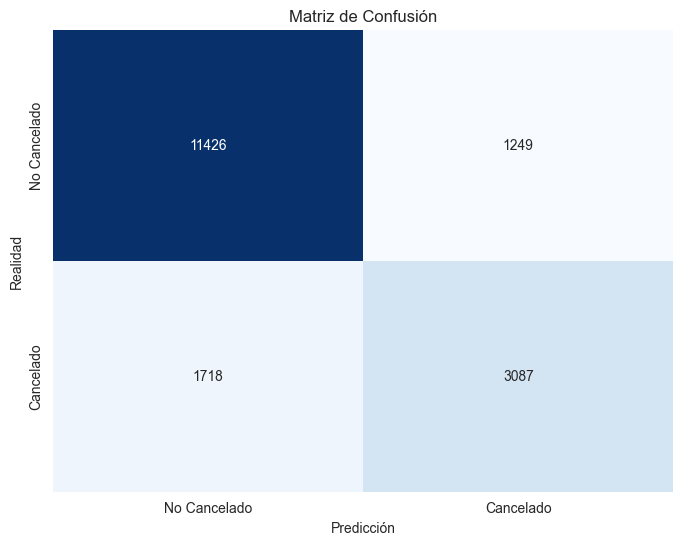

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Cancelado', 'Cancelado'], yticklabels=['No Cancelado', 'Cancelado'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

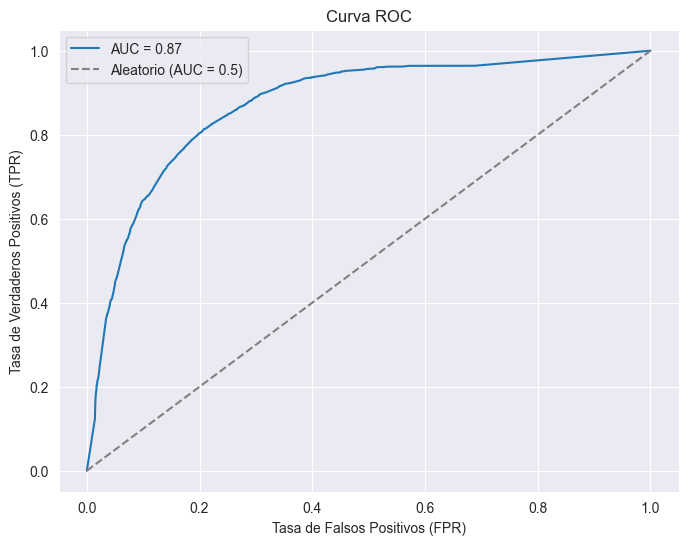

In [41]:
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Aleatorio (AUC = 0.5)')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

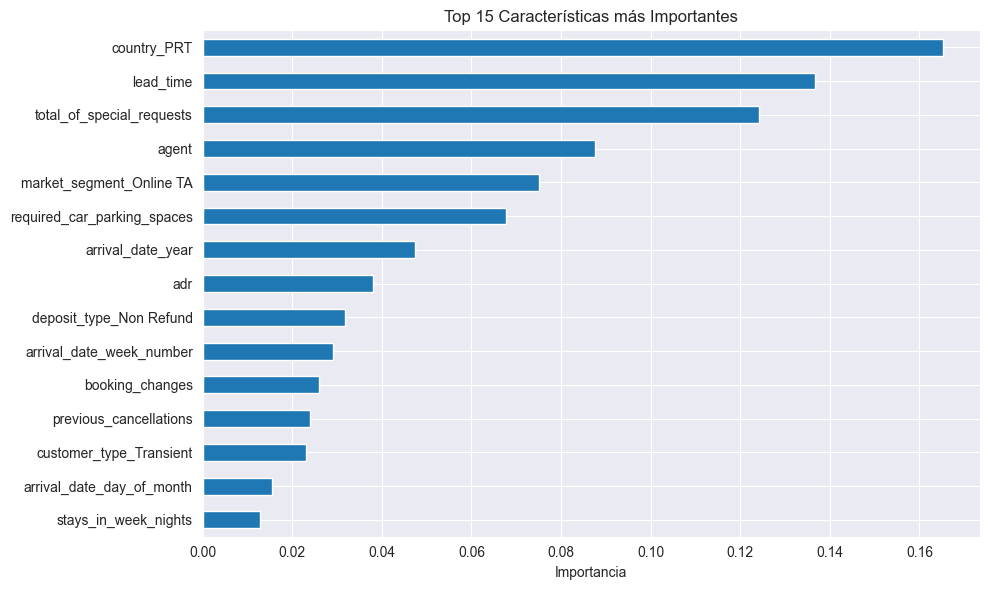

In [45]:
# Importancia de características
importances = pd.Series(model_dt.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 15 Características más Importantes')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

La mayoría de las reservas vienen de Portugal, por ende también la mayoría de cancelaciones.
Pero la variable más importante realmente es el *lead_time*.

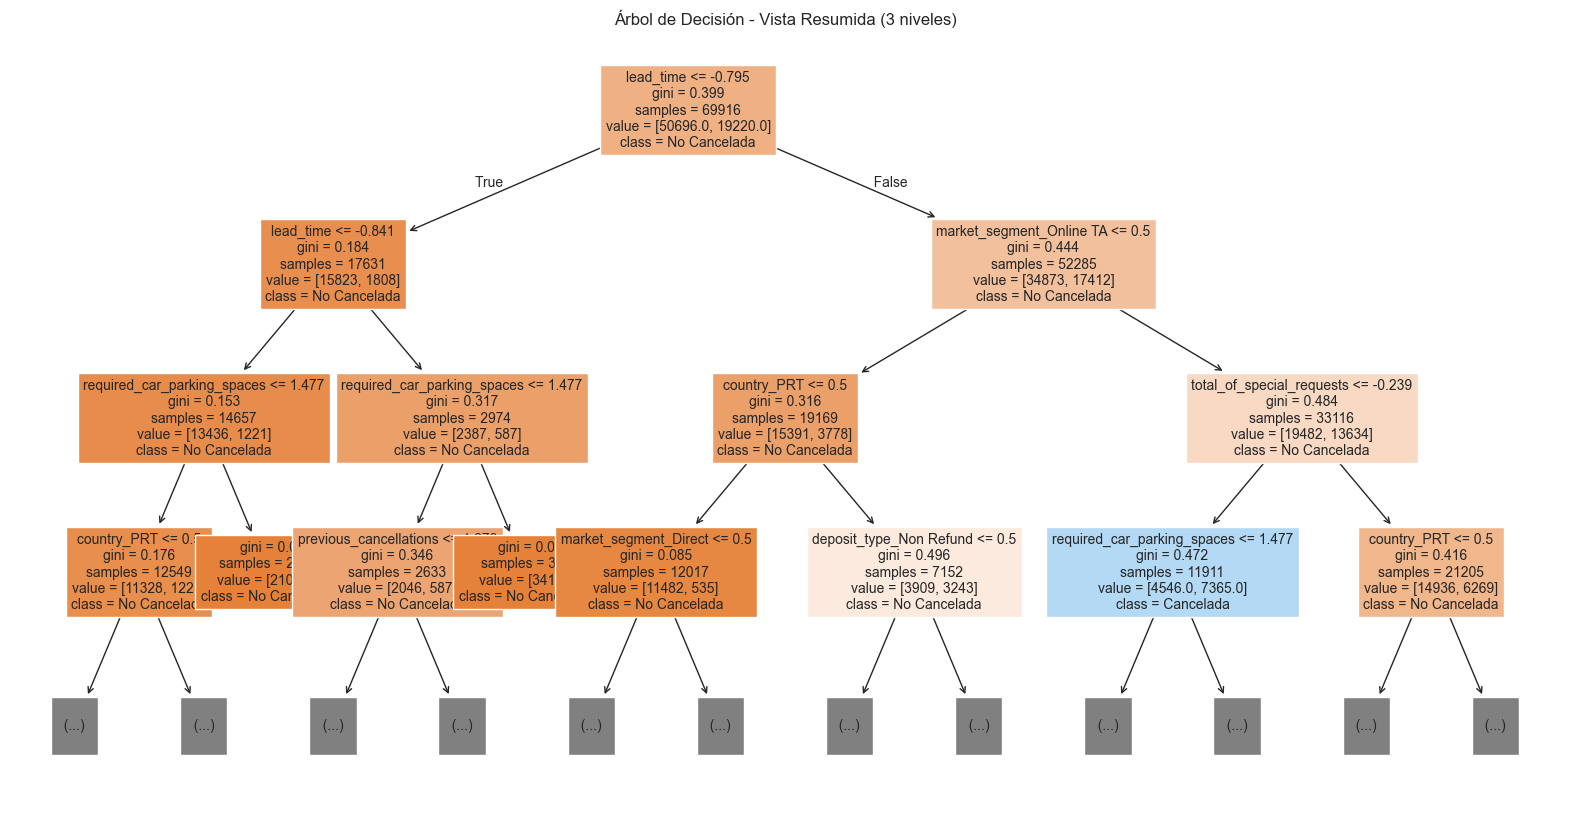

In [46]:
# Visualización del árbol (versión resumida)
plt.figure(figsize=(20, 10))
plot_tree(model_dt,
          feature_names=X.columns,
          class_names=["No Cancelada", "Cancelada"],
          filled=True,
          max_depth=3,
          fontsize=10)
plt.title("Árbol de Decisión - Vista Resumida (3 niveles)")
plt.show()